In [11]:
from itertools import combinations
import networkx as nx
from threading import Thread
import pylab

In [41]:
def TMVC(g, k):
    """
    The main Program. If the TM accepts, it will print "Accept".
    If the TM rejects, it will not print anything.
    In the end, the log "Main program ends" is printed.
    
    Inputs:
    - g: graph instance (e.g., the one created by networkx)
    - k: the size of the supposed vertex cover
    """
    run_tmvc(g, k)
    print('Main program ends')

def run_tmvc(g, k):
    for V_prime in combinations(list(g.nodes), k): # step 1 in the TMVC
                                                   # Nondeterministically select k distinct vertices
        t1 = Thread(target=verify, args=[g, V_prime]) # because this is a nondeterministic machine,
                                                      # we use threading library to simulate concurrent computing
        t1.start() # a call to start runs the thread 
        
def verify(g, V):
    """
    Step 2 in the TMVC
    Inputs:
    - g: graph instance (e.g., the one created by networkx)
    - V: the proposed set of vertices as vertex cover
    """
    # for each edge in g
    for edge in list(g.edges):
        u, v = edge[0], edge[1] # the two vertices the edge connects
        # if both vertices are not in V, we reject and this branch of computation halts
        if not (u in V or v in V):
            return
    # the below statements are reached if all the edges passed the test
    print('Accept')
    # print out the vertex cover for debugging purposes only.
    # This is not required and not a supposed output of the TM
    print('Vertex cover:', V)

# Demo 1

Let us observe the following graph

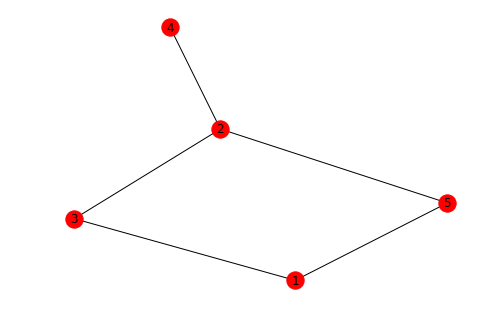

In [42]:
# create a graph
g = nx.Graph()
g.add_nodes_from([1, 2, 3, 4, 5])
g.add_edges_from([(1,3), (2,3), (1,5), (2,4),(2,5)])

# visualize the graph
g.pos = nx.spring_layout(g)
nx.draw(g, pos=g.pos, with_labels=True, 
       alpha=1)
pylab.show()

It turns out that this graph have the minimum vertex cover of size 2: {1,2}. Therefore, for $k<2$, the machine should reject, and for $k >= 2$, the machine should accept. 

In [43]:
TMVC(g, 1)

Main program ends


In [44]:
TMVC(g, 2)

Accept
Vertex cover: (1, 2)
Main program ends


In [47]:
TMVC(g, 3)

Accept
Vertex cover: (1, 2, 3)
Accept
Vertex cover: (1, 2, 4)
Accept
Vertex cover: (1, 2, 5)
Accept
Vertex cover: (2, 3, 5)
Accept
Vertex cover: (3, 4, 5)
Main program ends


In [46]:
TMVC(g, 4)

Accept
Vertex cover: (1, 2, 3, 4)
Accept
Vertex cover: (1, 2, 3, 5)
Accept
Vertex cover: (1, 2, 4, 5)
Accept
Vertex cover: (1, 3, 4, 5)
Accept
Vertex cover:Main program ends
 (2, 3, 4, 5)


In [48]:
TMVC(g, 5)

AcceptMain program ends

Vertex cover: (1, 2, 3, 4, 5)


# Demo 2

A more complicated example. Look at the left-most graph in this link: 
http://mathworld.wolfram.com/VertexCover.html

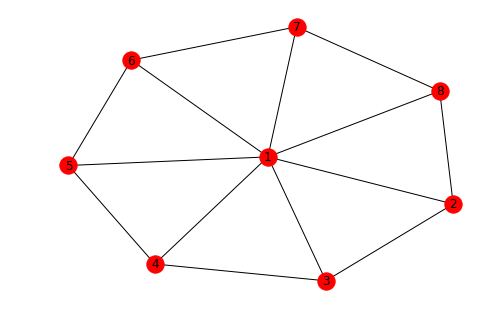

In [50]:
# create a graph
g = nx.Graph()
g.add_nodes_from(list(range(1,9)))

list_edge = []
for i in range(2,9):
    list_edge.append((1,i))
for i in range(2,8):
    list_edge.append((i,i+1))
list_edge.append((2,8))
g.add_edges_from(list_edge)

# visualize the graph
g.pos = nx.spring_layout(g)
nx.draw(g, pos=g.pos, with_labels=True, 
       alpha=1)
pylab.show()

The minimum vertex cover has size 5. For $k<5$ TMVC rejects. For $k>=5$, it accepts.

In [51]:
TMVC(g, 0)

Main program ends


In [52]:
TMVC(g, 1)

Main program ends


In [53]:
TMVC(g, 2)

Main program ends


In [54]:
TMVC(g, 3)

Main program ends


In [55]:
TMVC(g, 4)

Main program ends


In [56]:
TMVC(g, 5)

Accept
Vertex cover: (1, 2, 3, 5, 7)
Accept
Vertex cover: (1, 2, 4, 5, 7)
Accept
Vertex cover: (1, 2, 4, 6, 7)
Accept
Vertex cover: (1, 2, 4, 6, 8)
Accept
Vertex cover: (1, 3, 4, 6, 8)
Accept
Vertex cover: (1, 3, 5, 6, 8)
Accept
Vertex cover: (1, 3, 5, 7, 8)
Main program ends


In [57]:
TMVC(g, 6)

Accept
Vertex cover: (1, 2, 3, 4, 5, 7)
Accept
Vertex cover: (1, 2, 3, 4, 6, 7)
Accept
Vertex cover: (1, 2, 3, 4, 6, 8)
Accept
Vertex cover: (1, 2, 3, 5, 6, 7)
Accept
Vertex cover: (1, 2, 3, 5, 6, 8)
Accept
Vertex cover: (1, 2, 3, 5, 7, 8)
Accept
Vertex cover: (1, 2, 4, 5, 6, 7)
Accept
Vertex cover: (1, 2, 4, 5, 6, 8)
Accept
Vertex cover: (1, 2, 4, 5, 7, 8)
Accept
Vertex cover: (1, 2, 4, 6, 7, 8)
Accept
Vertex cover: (1, 3, 4, 5, 6, 8)
Accept
Vertex cover: (1, 3, 4, 5, 7, 8)
Accept
Vertex cover: (1, 3, 4, 6, 7, 8)
Accept
Vertex cover: (1, 3, 5, 6, 7, 8)
Main program ends


In [58]:
TMVC(g, 7)

Accept
Vertex cover: (1, 2, 3, 4, 5, 6, 7)
Accept
Vertex cover: (1, 2, 3, 4, 5, 6, 8)
Accept
Vertex cover: (1, 2, 3, 4, 5, 7, 8)
Accept
Vertex cover: (1, 2, 3, 4, 6, 7, 8)
Accept
Vertex cover: (1, 2, 3, 5, 6, 7, 8)
Accept
Vertex cover: (1, 2, 4, 5, 6, 7, 8)
Accept
Vertex cover: (1, 3, 4, 5, 6, 7, 8)
AcceptMain program ends

Vertex cover: (2, 3, 4, 5, 6, 7, 8)


In [59]:
TMVC(g, 8)

Accept
Vertex cover: (1, 2, 3, 4, 5, 6, 7, 8)
Main program ends
